FOR MY UNDERSTAND and CONVINENCE PURPOSE I WAS MAKE A ALL TASKS DIVIDED TINO 13 TASKS AND PROCEEDING DOING ONE BY ONE TASK

TASK - 1 top 5 most popular routes based on average passenger count

In [1]:

import pandas as pd

# All datastet sheets are loading from Excel to in this path
xls = pd.ExcelFile(r'D:/VERTOCITY INTEGRATED DATASCIENCE FILES/DATA SCIENCE END-TO-END CASPTONE PROJECTS/DATA-SCIENCE END-TO-END CASPTONE 1 PROJECT/transportSystem .xlsx')

# Load all sheets into pandas DataFrames
all_sheets = {sheet: pd.read_excel(xls, sheet_name=sheet) for sheet in xls.sheet_names}
print(all_sheets)

# Combining 'Routes Information' and 'Passenger Counts' after cleaning.
routes_info_cleaned = all_sheets['Routes Information'].dropna().drop_duplicates()  # Remove NaN and duplicates
passenger_counts_cleaned = all_sheets['Passenger Counts'].dropna().drop_duplicates()  # Clean passenger counts

# "Merge 'Routes Information' and 'Passenger Counts' based on Route ID."
combined_data = pd.merge(routes_info_cleaned, passenger_counts_cleaned, on="Route ID", how="inner")

# Clean the merged data by removing any remaining NaN values and duplicate rows.
combined_data_cleaned = combined_data.dropna().drop_duplicates()

# Calculate Average Passenger Count per Route
avg_passenger_count_per_route = combined_data_cleaned.groupby('Route ID')['Passenger Count'].mean()

# Identify the Top 5 Most Popular Routes based on Average Passenger Count
top_5_routes = avg_passenger_count_per_route.sort_values(ascending=False).head(5)

# Step 6: Print the Top 5 Routes based on Average Passenger Count
print("Top 5 Popular Routes based on Average Passenger Count:")
print(top_5_routes)

# Optional: You can visualize the data using a bar chart, line chart, or other plots.

{'Routes Information PIVOTE':     Start Point         (Multiple Items)
0     End Point                Station E
1           NaN                      NaN
2    Row Labels  Sum of Stops In Between
3            13                        8
4            35                        9
..          ...                      ...
80          668                        2
81          674                        2
82          686                        3
83          699                        3
84  Grand Total                      444

[85 rows x 2 columns], 'Routes Information':      Route ID Start Point  End Point  Stops In Between
0           1   Station C  Station G                 9
1           2   Station C  Station E                 7
2           3   Station C  Station E                 6
3           4   Station C  Station F                 8
4           5   Station C  Station E                 9
..        ...         ...        ...               ...
695       696   Station A  Station F           

In [17]:
print(all_sheets)

{'Routes Information PIVOTE':     Start Point         (Multiple Items)
0     End Point                Station E
1           NaN                      NaN
2    Row Labels  Sum of Stops In Between
3            13                        8
4            35                        9
..          ...                      ...
80          668                        2
81          674                        2
82          686                        3
83          699                        3
84  Grand Total                      444

[85 rows x 2 columns], 'Routes Information':      Route ID Start Point  End Point  Stops In Between
0           1   Station C  Station G                 9
1           2   Station C  Station E                 7
2           3   Station C  Station E                 6
3           4   Station C  Station F                 8
4           5   Station C  Station E                 9
..        ...         ...        ...               ...
695       696   Station A  Station F           

In [3]:
# Step 6: Print the Top 5 Routes based on Average Passenger Count
print("Top 5 Popular Routes based on Average Passenger Count:")
print(top_5_routes)

Top 5 Popular Routes based on Average Passenger Count:
Route ID
99     99.0
196    99.0
481    99.0
231    99.0
18     99.0
Name: Passenger Count, dtype: float64


TASK-6:Initial data cleaning operations,such as handling missing values,standardizing 
column names, and filtering out irrelevant data


In [5]:


# Choose the required columns from the 'Passenger Counts' dataset.
passenger_counts_cleaned = all_sheets['Passenger Counts'].dropna().drop_duplicates()  # NaN values, duplicates to remove 

# making Column names standardize 
routes_info_cleaned.columns = routes_info_cleaned.columns.str.strip().str.lower().str.replace(" ", "_")  # Column names standardization
passenger_counts_cleaned.columns = passenger_counts_cleaned.columns.str.strip().str.lower().str.replace(" ", "_")  # Column names standardization

# Step 4: Irrelevant Data Filtering - Example, removing columns that are not useful
# (This is just an example; you should adjust the columns you need based on your dataset)
routes_info_cleaned = routes_info_cleaned[['route_id', 'start_point', 'end_point', 'stops_in_between']]  # Select relevant columns
passenger_counts_cleaned = passenger_counts_cleaned[['route_id', 'passenger_count', 'time_of_day']]  # Select relevant columns

# Step 5: Merge "Routes Information" and "Passenger Counts" based on Route ID
combined_data = pd.merge(routes_info_cleaned, passenger_counts_cleaned, on="route_id", how="inner")

# Step 6: Clean Combined Data - Drop NaN values and Duplicates
combined_data_cleaned = combined_data.dropna().drop_duplicates()

# Display the first few rows of the cleaned and merged data
print(combined_data_cleaned.head())

# Now, you can proceed with further analysis or visualization based on this cleaned data.


   route_id start_point  end_point  stops_in_between  passenger_count  \
0         1   Station C  Station G                 9               84   
1         1   Station C  Station G                 9               88   
2         2   Station C  Station E                 7               35   
3         4   Station C  Station F                 8               34   
4         7   Station C  Station F                 3               34   

  time_of_day  
0       13:09  
1       01:16  
2       05:20  
3       21:27  
4       19:15  


In [23]:
print(combined_data_cleaned)

     route_id start_point  end_point  stops_in_between  passenger_count  \
0           1   Station C  Station G                 9               84   
1           1   Station C  Station G                 9               88   
2           2   Station C  Station E                 7               35   
3           4   Station C  Station F                 8               34   
4           7   Station C  Station F                 3               34   
..        ...         ...        ...               ...              ...   
695       698   Station D  Station H                 2               47   
696       700   Station D  Station F                 6               30   
697       700   Station D  Station F                 6               23   
698       700   Station D  Station F                 6                6   
699       700   Station D  Station F                 6               43   

    time_of_day  
0         13:09  
1         01:16  
2         05:20  
3         21:27  
4        

TASK-7: Identify the most and least utilized routes based on total passenger counts

In [7]:
# Task 7: Route Utilization Analysis

import pandas as pd
import numpy as np

# I Assuming heare i have  have already run Task 1 and Task 6, so i `combined_data_cleaned` is ready.

def analyze_route_utilization(combined_data_cleaned):
    """
    This function identifies the most and least utilized routes based on total passenger counts.
    
    Args:
    combined_data_cleaned (DataFrame): The cleaned dataset with 'route_id' and 'passenger_count'.
    
    Returns:
    tuple: (most_utilized_route, least_utilized_route)
    """
    
    # Aggregate total passenger count per route
    route_passenger_counts = combined_data_cleaned.groupby('route_id')['passenger_count'].sum().reset_index()
    
    # Sort the routes by passenger count in descending order
    sorted_routes = route_passenger_counts.sort_values(by='passenger_count', ascending=False)
    
    # Identify the most and least utilized routes
    most_utilized_route = sorted_routes.iloc[0]  # Highest passenger count
    least_utilized_route = sorted_routes.iloc[-1]  # Lowest passenger count
    
    return most_utilized_route, least_utilized_route

# Sample usage: we can Assuming the  `combined_data_cleaned` is available after Task 1 and Task 6

most_route, least_route = analyze_route_utilization(combined_data_cleaned)

# Printing the most and least utilized routes
print("Most Utilized Route: ", most_route)
print("Least Utilized Route: ", least_route)


Most Utilized Route:  route_id           142
passenger_count    284
Name: 90, dtype: int64
Least Utilized Route:  route_id           228
passenger_count      0
Name: 146, dtype: int64


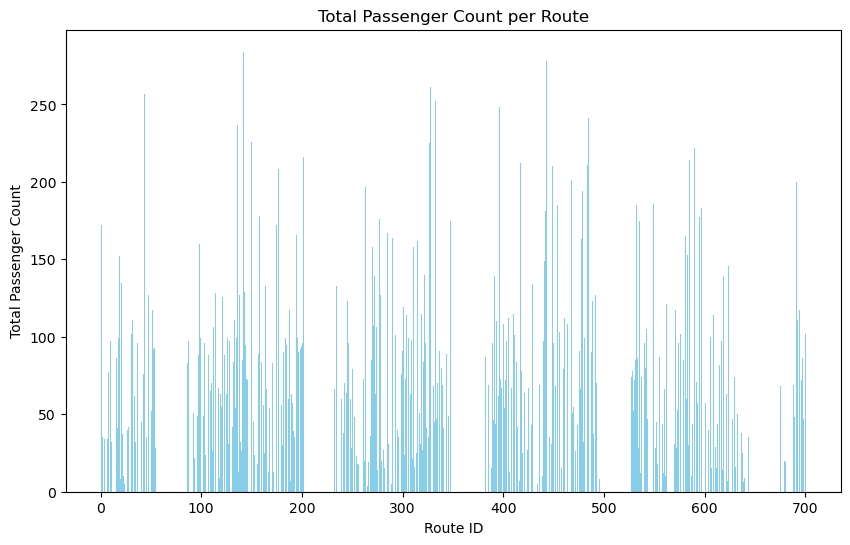

Most Utilized Route: route_id           142
passenger_count    284
Name: 90, dtype: int64
Least Utilized Route: route_id           228
passenger_count      0
Name: 146, dtype: int64


In [9]:
import matplotlib.pyplot as plt

# Visualization for most and least utilized routes
route_passenger_counts = combined_data_cleaned.groupby('route_id')['passenger_count'].sum().reset_index()

# Sorting to the routes based on passenger count
sorted_routes = route_passenger_counts.sort_values(by='passenger_count', ascending=False)

# Most and Least utilized routes
most_utilized_route = sorted_routes.iloc[0]
least_utilized_route = sorted_routes.iloc[-1]

# Plotting
plt.figure(figsize=(10,6))
plt.bar(sorted_routes['route_id'], sorted_routes['passenger_count'], color='skyblue')
plt.xlabel('Route ID')
plt.ylabel('Total Passenger Count')
plt.title('Total Passenger Count per Route')
plt.show()

# Displaying the results
print("Most Utilized Route:", most_utilized_route)
print("Least Utilized Route:", least_utilized_route)


TASK 8 - Calculate  the  average,  minimum,  and  maximum  passenger
count per route.


In [11]:
import pandas as pd

# i Assuming the `combined_data_cleaned` is already available and i previously done,  from Task 1, Task 6, and Task 7
def calculate_passenger_count_metrics(combined_data_cleaned):
    """
    This function calculates the average, minimum, and maximum passenger count per route.
    It returns a dictionary where the key is the Route ID and the value is another dictionary
    containing average, min, and max passenger counts.
    
    Args:
    combined_data_cleaned (DataFrame): The cleaned dataset with 'route_id' and 'passenger_count'.
    
    Returns:
    dict: A dictionary containing the metrics (average, min, max) for each route.
    """
    
    #  Group by Route ID and calculate the necessary metrics (mean, min, max)
    route_metrics = combined_data_cleaned.groupby('route_id')['passenger_count'].agg(
        average='mean',
        minimum='min',
        maximum='max'
    ).reset_index()
    
    # fro this we can Convert the DataFrame into a dictionary where the Route ID is making the key
    route_metrics_dict = route_metrics.set_index('route_id').to_dict(orient='index')
    
    return route_metrics_dict

# Sample usage:
# actaully i Assuming `combined_data_cleaned` is available after previous Tasks 1, Task 6, and Task 7
route_metrics = calculate_passenger_count_metrics(combined_data_cleaned)

# Print the metrics for each route
print("Passenger Count Metrics for Each Route:")
for route_id, metrics in route_metrics.items():
    print(f"Route ID: {route_id} -> Average: {metrics['average']}, Min: {metrics['minimum']}, Max: {metrics['maximum']}")


Passenger Count Metrics for Each Route:
Route ID: 1 -> Average: 86.0, Min: 84, Max: 88
Route ID: 2 -> Average: 35.0, Min: 35, Max: 35
Route ID: 4 -> Average: 34.0, Min: 34, Max: 34
Route ID: 7 -> Average: 34.0, Min: 34, Max: 34
Route ID: 8 -> Average: 77.0, Min: 77, Max: 77
Route ID: 10 -> Average: 97.0, Min: 97, Max: 97
Route ID: 11 -> Average: 32.0, Min: 32, Max: 32
Route ID: 16 -> Average: 43.0, Min: 3, Max: 83
Route ID: 17 -> Average: 41.0, Min: 41, Max: 41
Route ID: 18 -> Average: 99.0, Min: 99, Max: 99
Route ID: 19 -> Average: 76.0, Min: 73, Max: 79
Route ID: 20 -> Average: 8.0, Min: 8, Max: 8
Route ID: 21 -> Average: 67.5, Min: 39, Max: 96
Route ID: 22 -> Average: 37.0, Min: 37, Max: 37
Route ID: 23 -> Average: 10.0, Min: 10, Max: 10
Route ID: 24 -> Average: 5.0, Min: 5, Max: 5
Route ID: 27 -> Average: 40.0, Min: 40, Max: 40
Route ID: 28 -> Average: 42.0, Min: 42, Max: 42
Route ID: 31 -> Average: 51.0, Min: 12, Max: 90
Route ID: 32 -> Average: 37.0, Min: 11, Max: 82
Route ID: 34

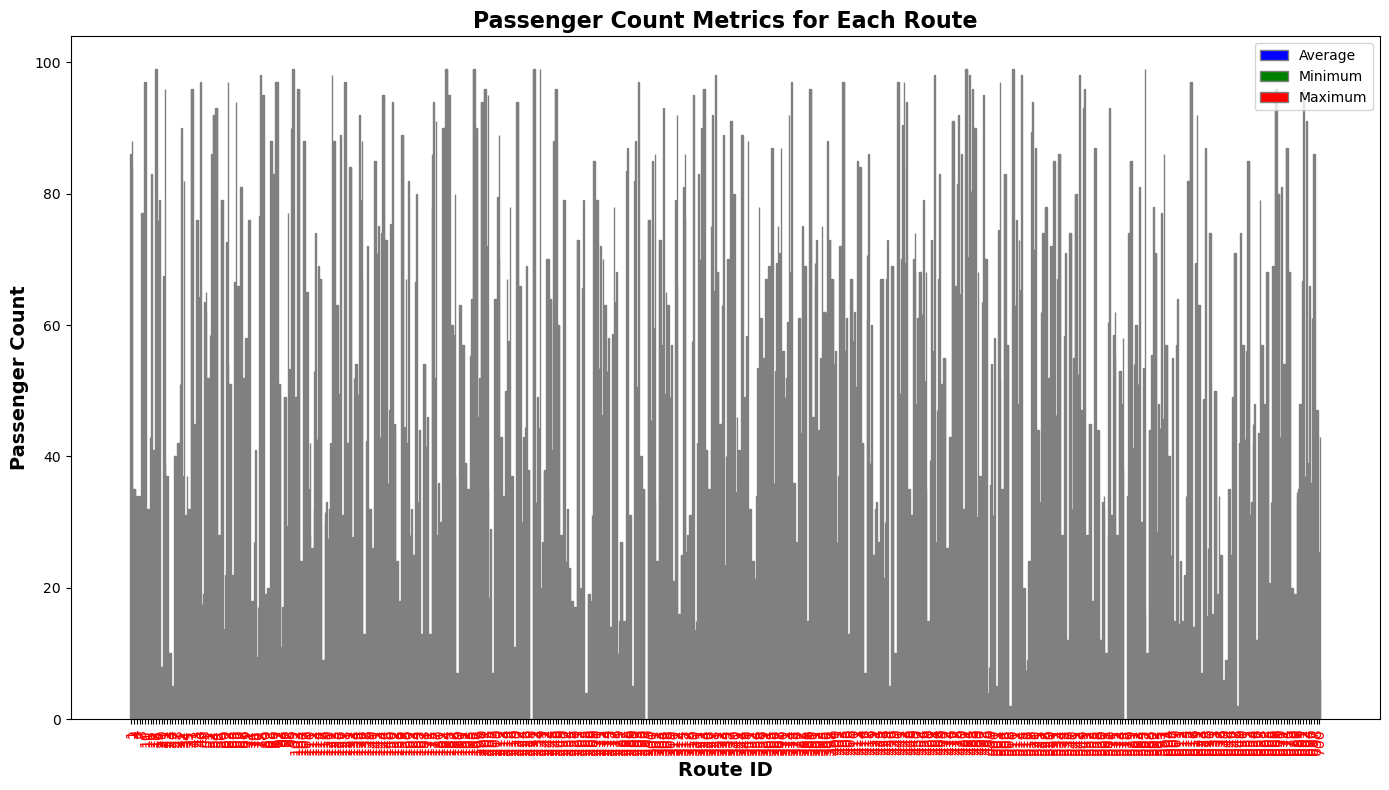

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# I Assuming `combined_data_cleaned` is already available from Task 1, Task 6, and Task 7
def calculate_passenger_count_metrics_and_plot(combined_data_cleaned):
    """
    This function calculates the average, minimum, and maximum passenger count per route,
    and then plots the metrics on a bar chart for each route.
    
    Args:
    combined_data_cleaned (DataFrame): The cleaned dataset with 'route_id' and 'passenger_count'.
    
    Returns:
    None: It directly plots the bar chart.
    """
    
    # Step 1: Group by Route ID and calculate the necessary metrics (mean, min, max)
    route_metrics = combined_data_cleaned.groupby('route_id')['passenger_count'].agg(
        average='mean',
        minimum='min',
        maximum='max'
    ).reset_index()
    
    # Step 2: Plotting the metrics using a bar chart
    bar_width = 0.25
    
    # Set position of bar on X axis
    r1 = range(len(route_metrics))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    # Create a bar plot
    plt.figure(figsize=(14, 8))  # Increase figure size
    
    plt.bar(r1, route_metrics['average'], color='b', width=bar_width, edgecolor='grey', label='Average')
    plt.bar(r2, route_metrics['minimum'], color='g', width=bar_width, edgecolor='grey', label='Minimum')
    plt.bar(r3, route_metrics['maximum'], color='r', width=bar_width, edgecolor='grey', label='Maximum')
    
    # Adding labels and title
    plt.xlabel('Route ID', fontweight='bold', fontsize=14)
    plt.ylabel('Passenger Count', fontweight='bold', fontsize=14)
    plt.title('Passenger Count Metrics for Each Route', fontweight='bold', fontsize=16)
    
    # Add the route labels on x-axis and set the color to red
    plt.xticks([r + bar_width for r in range(len(route_metrics))], route_metrics['route_id'].astype(str), color='red', fontsize=10, rotation=90)
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Sample usage:
# I Assuming `combined_data_cleaned` is available after Task 1, Task 6, and Task 7
calculate_passenger_count_metrics_and_plot(combined_data_cleaned)


TASK 9 - Line Chart - Passenger Count Trends, Bar Chart - Average Passenger Count per Route, Heatmap - Correlation Between Route Attributes and Average Passenger Count

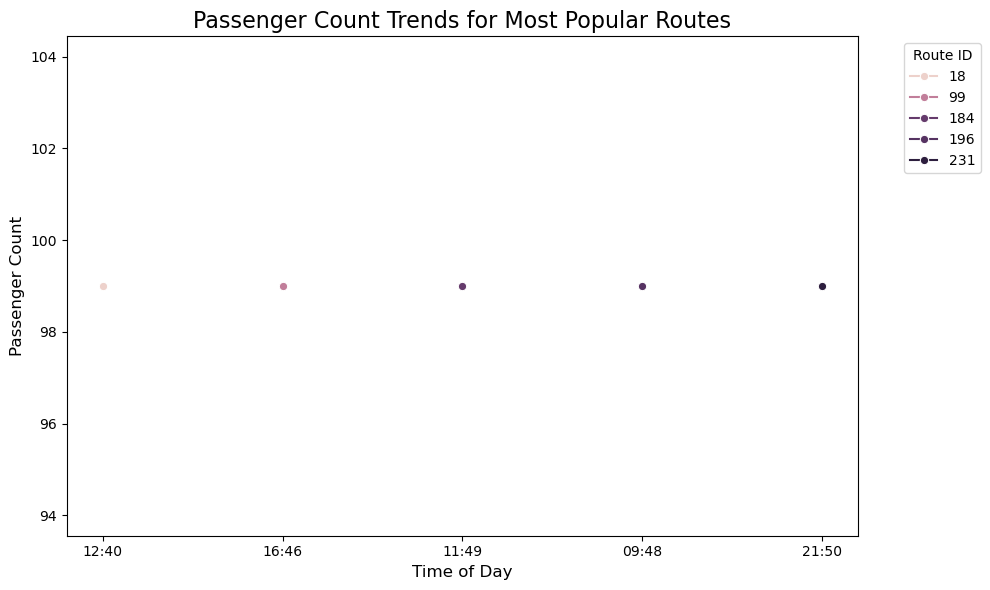

C:\Users\badug\AppData\Local\Temp\ipykernel_7332\1178772326.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='route_id', y='passenger_count', data=avg_passenger_count_per_route, palette='viridis')


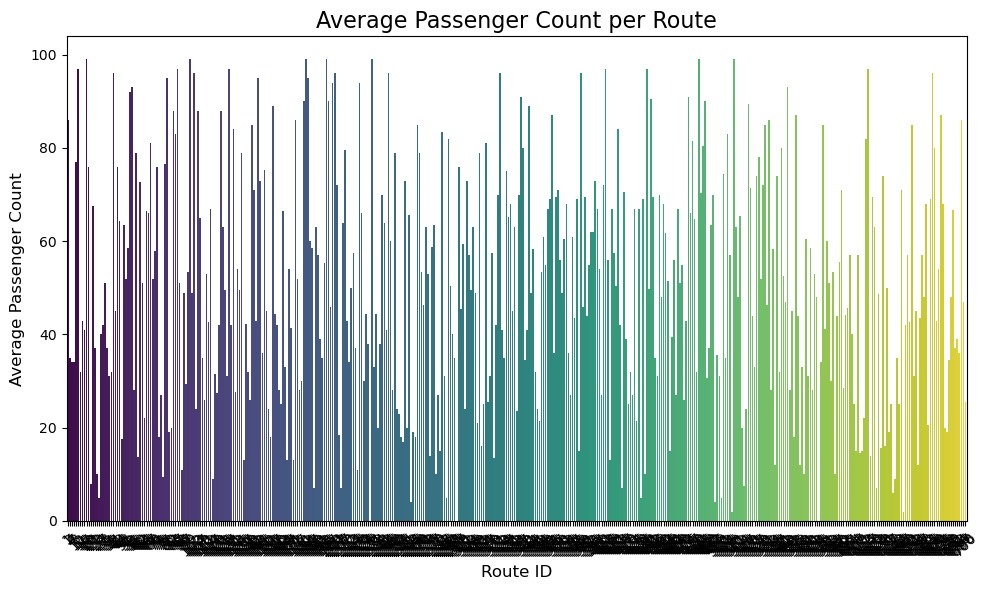

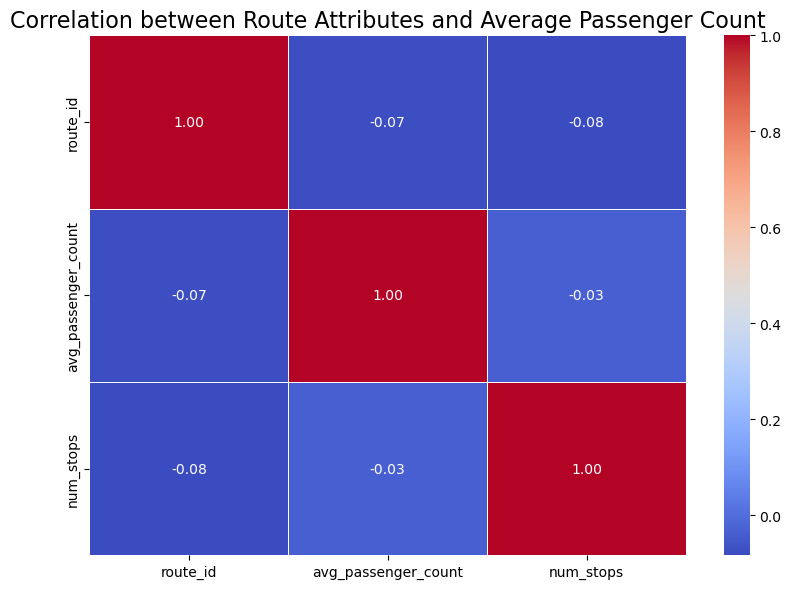

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I have to Assuming `combined_data_cleaned` is already available previous tasks 1, 6,7,8.

# Line Chart showing Trends over Time for Passenger Counts on the Most Popular Routes
def plot_line_chart(combined_data_cleaned):
    """
    Plots a line chart to show trends in passenger counts over time for the most popular routes.
    """
    # Group data by route and time of day, calculating the sum of passengers
    route_time_trends = combined_data_cleaned.groupby(['route_id', 'time_of_day'])['passenger_count'].sum().reset_index()
    
    # Find top 5 most popular routes based on average passenger count
    top_5_routes = combined_data_cleaned.groupby('route_id')['passenger_count'].mean().nlargest(5).index
    top_5_route_data = route_time_trends[route_time_trends['route_id'].isin(top_5_routes)]
    
    # Plotting the line chart
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=top_5_route_data, x='time_of_day', y='passenger_count', hue='route_id', marker='o')
    
    plt.title('Passenger Count Trends for Most Popular Routes', fontsize=16)
    plt.xlabel('Time of Day', fontsize=12)
    plt.ylabel('Passenger Count', fontsize=12)
    plt.legend(title='Route ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Step 2: Bar Chart comparing Average Passenger Counts across Different Routes
def plot_bar_chart(combined_data_cleaned):
    """
    Plots a bar chart comparing average passenger counts across different routes.
    """
    # Calculate average passenger count per route
    avg_passenger_count_per_route = combined_data_cleaned.groupby('route_id')['passenger_count'].mean().reset_index()
    
    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='route_id', y='passenger_count', data=avg_passenger_count_per_route, palette='viridis')
    
    plt.title('Average Passenger Count per Route', fontsize=16)
    plt.xlabel('Route ID', fontsize=12)
    plt.ylabel('Average Passenger Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 3: Heatmap showing the correlation between route attributes and average passenger count
def plot_heatmap(combined_data_cleaned):
    """
    Plots a heatmap showing the correlation between route attributes (length, stops, etc.)
    and average passenger count.
    """
    # Calculate average passenger count per route and route attributes (e.g., number of stops)
    route_attributes = combined_data_cleaned.groupby('route_id').agg(
        avg_passenger_count=('passenger_count', 'mean'),
        num_stops=('stops_in_between', 'mean')  # Using stops_in_between as a proxy for stops
    ).reset_index()
    
    # Correlation matrix
    correlation_matrix = route_attributes.corr()
    
    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    plt.title('Correlation between Route Attributes and Average Passenger Count', fontsize=16)
    plt.tight_layout()
    plt.show()

# Sample usage: Assuming `combined_data_cleaned` is available after Task 1, Task 6, Task 7, and Task 8
plot_line_chart(combined_data_cleaned)  # Call to plot the line chart
plot_bar_chart(combined_data_cleaned)   # Call to plot the bar chart
plot_heatmap(combined_data_cleaned)     # Call to plot the heatmap


In [19]:
print(combined_data_cleaned.columns)


Index(['route_id', 'start_point', 'end_point', 'stops_in_between',
       'passenger_count', 'time_of_day'],
      dtype='object')


In [21]:
# Check the columns in your dataset
print(combined_data_cleaned.columns)


Index(['route_id', 'start_point', 'end_point', 'stops_in_between',
       'passenger_count', 'time_of_day'],
      dtype='object')


TASK 10-  10)Develop a Random Forest model to predict passenger loads on
different routes and times.



In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# I will Assuming `combined_data_cleaned` is already cleaned and available

# Step 1: Data Preprocessing
# Convert 'time_of_day' to numeric (using the hour part)
combined_data_cleaned['time_of_day'] = pd.to_datetime(combined_data_cleaned['time_of_day'], errors='coerce').dt.hour

# Handle missing values in 'time_of_day' (if any)
combined_data_cleaned['time_of_day'].fillna(combined_data_cleaned['time_of_day'].mean(), inplace=True)

# Encoding 'route_id' to numeric (if not already done)
combined_data_cleaned['route_id'] = combined_data_cleaned['route_id'].astype('category').cat.codes

# Features (X) and Target Variable (y)
X = combined_data_cleaned[['route_id', 'stops_in_between', 'time_of_day']]  # Using 'time_of_day' after conversion
y = combined_data_cleaned['passenger_count']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training (Random Forest Regressor for predicting continuous passenger counts)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Model Prediction
y_pred = rf_model.predict(X_test)

# Step 5: Model Evaluation (For Regression)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Output the regression evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

# Step 6: Feature Importance (for model interpretability)
feature_importance = rf_model.feature_importances_
print(f'Feature Importances: {feature_importance}')


C:\Users\badug\AppData\Local\Temp\ipykernel_7332\927529146.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data_cleaned['time_of_day'] = pd.to_datetime(combined_data_cleaned['time_of_day'], errors='coerce').dt.hour
C:\Users\badug\AppData\Local\Temp\ipykernel_7332\927529146.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data_cleaned['time_of_day'].fillna(combine

Mean Squared Error (MSE): 1164.0247034531747
Root Mean Squared Error (RMSE): 34.11780625206103
R-squared: -0.3532650859383877
Feature Importances: [0.5342753  0.16401965 0.30170505]


C:\Users\badug\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
#1. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
}

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search to the training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [28]:
# 2. Cross-Validation:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: ", cv_scores.mean())


Cross-validation scores:  [-0.06724127 -0.283561   -0.20859708 -0.08281231 -0.24904092]
Mean CV score:  -0.17825051648861442


In [31]:
# 3. Feature Engineering
# Convert time_of_day to dayparts (morning, afternoon, evening)
combined_data_cleaned['daypart'] = combined_data_cleaned['time_of_day'].apply(lambda x: 'morning' if 6 <= x < 12 else 'afternoon' if 12 <= x < 18 else 'evening')

# Now use the 'daypart' feature instead of 'time_of_day'
X = combined_data_cleaned[['route_id', 'stops_in_between', 'daypart']]  # Using 'daypart' after feature engineering


In [33]:
# 4. Feature Selection:

from sklearn.feature_selection import RFE

# Using RFE for feature selection
selector = RFE(RandomForestRegressor(), n_features_to_select=3)
selector = selector.fit(X_train, y_train)

# Get selected features
print("Selected Features: ", X_train.columns[selector.support_])


Selected Features:  Index(['route_id', 'stops_in_between', 'time_of_day'], dtype='object')


In [43]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 93.1 kB/s eta 0:22:22
   ---------------------------------------- 0.0/124.9 MB 217.9 kB/s eta 0:09:34
   ---------------------------------------- 0.1/124.9 MB 502.0 kB/s eta 0:04:09
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:58
   ---------------------------------------- 0.4/124.9 MB 1.2 MB/s eta 0:01:47
   ---------------------------------------- 0.4/124.9 MB 1.2 MB/s eta 0:01:49
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:54
   ---------------------------------------- 0.5/124.9 MB 1.1 MB/s eta 0:01:54
   ---------------------------------------- 0.5/124.9 MB 1.1 MB/s eta 0:01:52
   ---------------------------------------- 0.6/124.9 MB 1.1 MB/s eta 0:01:54
  

In [35]:
# 5. Try Alternative Models:

import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
xgb_model.fit(X_train, y_train)

# Prediction
y_pred_xgb = xgb_model.predict(X_test)
print(y_pred_xgb)

[ 21.365932   59.119728   82.31252    44.40336    37.797256   48.60715
  57.889565   39.299007   45.189316   61.72083    78.9049     73.183205
  62.466965  -14.674688   74.38168    43.003056   80.62175    20.68358
  24.191847   48.010315   47.889618   57.63917    83.49877    39.299007
  12.047512   65.744995   73.63123    86.98363    21.892214   43.677708
  70.84721    49.422943   72.72633    20.226826   66.513596   56.981094
   4.2559686  49.616695   39.343937   58.549896   84.49686    16.095045
  15.228103   36.064342   14.2650385  40.91629    72.485214   61.636963
  55.09691    56.632347   85.31995    85.638145   30.040699   14.443596
  76.7723     25.117157   73.243256   32.84257    15.331077   72.00877
  37.988758   71.73319    37.67669    55.09691    75.046425   36.75474
  40.02221    59.529945   52.687286   67.74899    70.779015   71.84491
  23.964985   74.51257    66.22187    39.253284   69.47126    17.955858
  36.272404   28.579348   45.55717     2.5076554  21.15911    27.7434

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression model for comparison
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# MSE comparison
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")


Linear Regression MSE: 861.1365588869264


Task -11 : Data Preprocessing:  selecting relevant features
that might influence passenger loads, such as route ID, time of day, day
of the week, and special events or holidays.


In [39]:
# Step 1: Clean the data (Task 1)
import pandas as pd

# Load the necessary sheets again
file_path = r'D:/VERTOCITY INTEGRATED DATASCIENCE FILES/DATA SCIENCE END-TO-END CASPTONE PROJECTS/DATA-SCIENCE END-TO-END CASPTONE 1 PROJECT/transportSystem .xlsx'
routes_info = pd.read_excel(file_path, sheet_name='Routes Information')
passenger_counts = pd.read_excel(file_path, sheet_name='Passenger Counts')

# Clean the data by removing NaN values and duplicates
routes_info_cleaned = routes_info.dropna().drop_duplicates()
passenger_counts_cleaned = passenger_counts.dropna().drop_duplicates()

# Merge the cleaned data
combined_data = pd.merge(routes_info_cleaned, passenger_counts_cleaned, on="Route ID", how="inner")

# Further clean the merged data (remove any remaining NaN or duplicates)
combined_data_cleaned = combined_data.dropna().drop_duplicates()

# Now proceed with Task 11 (Data Preprocessing)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Feature selection
features = combined_data_cleaned[['Route ID', 'Stops In Between', 'Time of Day']]  # Select relevant features
target = combined_data_cleaned['Passenger Count']  # The target variable (Passenger Count)

# Handle Categorical Variables - Convert 'Time of Day' to numerical values
encoder = LabelEncoder()
features['Time of Day'] = encoder.fit_transform(features['Time of Day'])

# Train-Test Split
X = features  # Features
y = target  # Target variable

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show a preview of the train and test splits
print("Training data:")
print(X_train.head())
print("Test data:")
print(X_test.head())


Training data:
     Route ID  Stops In Between  Time of Day
82         97                 5          249
51         62                 7          157
220       224                 8           91
669       666                 9           10
545       536                 3          103
Test data:
     Route ID  Stops In Between  Time of Day
158       160                 8           75
500       499                 8          508
396       396                 3          253
155       158                 3          375
321       322                 4          374


C:\Users\badug\AppData\Local\Temp\ipykernel_7332\330218033.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Time of Day'] = encoder.fit_transform(features['Time of Day'])


TASK 12- K-Means clustering to segment bus routes based on patterns in
passenger loads and timings AND groups of routes that may benefit from different optimization strategies

C:\Users\badug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\badug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\badug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\badug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

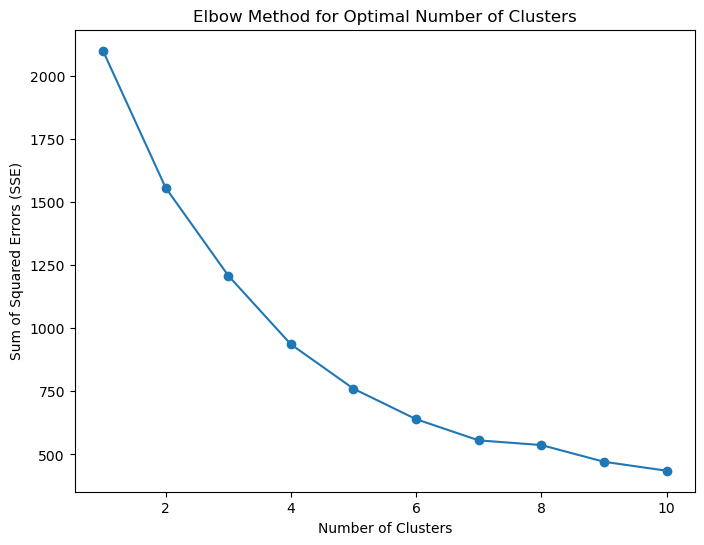

   Route ID  Cluster
0         1        2
1         1        2
2         2        2
3         4        2
4         7        0


C:\Users\badug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# I Assuming combined_data_cleaned is available from Task 1 to Task 11 those are previous tasks
# We will use features like 'Route ID', 'Stops In Between', and 'Passenger Count'

# Select features for clustering (if we need more you can add more features (if needed))
features = combined_data_cleaned[['Route ID', 'Stops In Between', 'Passenger Count']]

# Normalize or Standardize the data (Optional but recommended for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):  # Testing for k=1 to k=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared errors

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Step 4: Apply K-Means Clustering with the optimal number of clusters (assumed as 3 here)
optimal_k = 3  # Assume elbow method suggests 3 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
combined_data_cleaned['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 5: Check the clusters
print(combined_data_cleaned[['Route ID', 'Cluster']].head())


C:\Users\badug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


   Route ID  Cluster
0         1        2
1         1        2
2         2        2
3         4        2
4         7        2


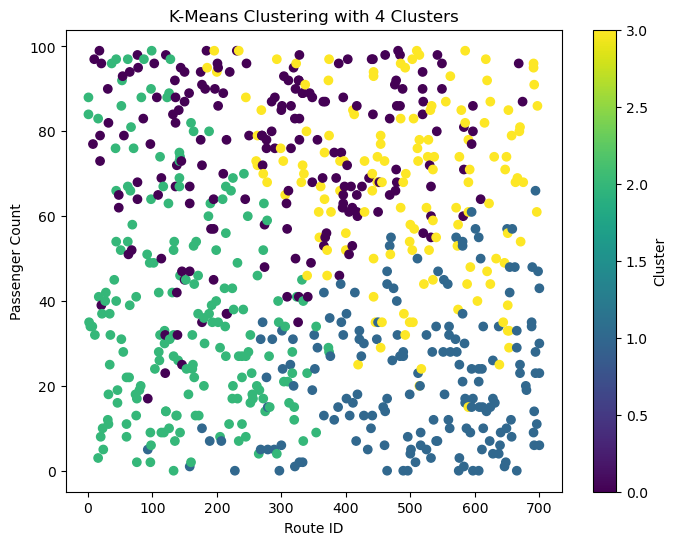

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#I Assuming combined_data_cleaned is available from previous tasks
# We will use features like 'Route ID', 'Stops In Between', and 'Passenger Count'

# Step 1: Select features for clustering (you can add more features if needed)
features = combined_data_cleaned[['Route ID', 'Stops In Between', 'Passenger Count']]

# Step 2: Normalize or Standardize the data (Optional but recommended for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Apply K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
combined_data_cleaned['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 4: Check the clusters and visualize the results
print(combined_data_cleaned[['Route ID', 'Cluster']].head())

# Optional: Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(combined_data_cleaned['Route ID'], combined_data_cleaned['Passenger Count'], c=combined_data_cleaned['Cluster'], cmap='viridis')
plt.title('K-Means Clustering with 4 Clusters')
plt.xlabel('Route ID')
plt.ylabel('Passenger Count')
plt.colorbar(label='Cluster')
plt.show()


task 13-  Select features relevant to passenger patterns, such
as average passenger load, peak travel times, and variability in
passenger counts.


In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming combined_data_cleaned is available from Task 1 to Task 12

# Step 1: Select relevant features for clustering (e.g., passenger patterns)
features = combined_data_cleaned[['Route ID', 'Stops In Between', 'Passenger Count']]  # Add more features if needed

# Step 2: Normalize the data
# You can use either MinMaxScaler or StandardScaler depending on the dataset
scaler = MinMaxScaler()  # or StandardScaler() for standardization
features_scaled = scaler.fit_transform(features)

# Step 3: Check the normalized data
normalized_data = pd.DataFrame(features_scaled, columns=features.columns)

# Optional: Print the normalized data preview
print(normalized_data.head())


   Route ID  Stops In Between  Passenger Count
0  0.000000          1.000000         0.848485
1  0.000000          1.000000         0.888889
2  0.001431          0.714286         0.353535
3  0.004292          0.857143         0.343434
4  0.008584          0.142857         0.343434


Task 2- Create a sequence to automatically assign unique IDs to new entries
in the passenger_feedback table. I was donw this in Sql query in Sql server


created unique id genrating in sql srevr manually cause, not possible to with system requirements

Remaning tasks are relate to SQL quereis and PowerBi those do in Powerbi and sql.